<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Image%20Classification/Cifar10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification Project**

In [10]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.datasets import cifar10, cifar100
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import time

In [2]:
# 2. Load dữ liệu cifar
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


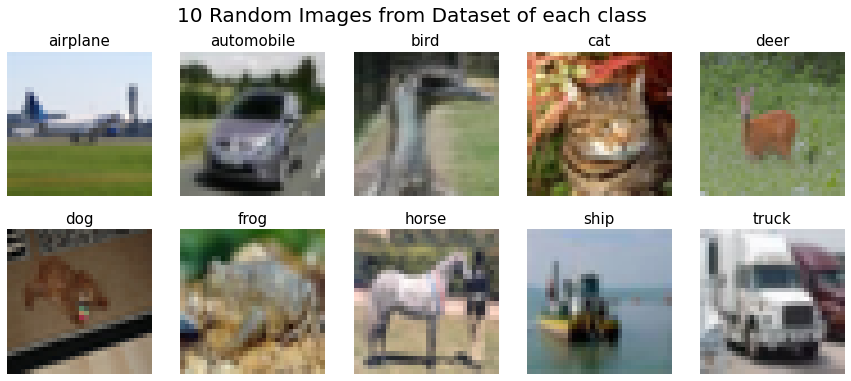

In [3]:
# 3. show image
def get_ten_random_images():
  d = {}
  while len(d.keys()) < 10:
      idx = random.randint(0, len(y_train)-1)
      if y_train[idx][0] not in d.keys():
          d[y_train[idx][0]] = idx
  return d

d = get_ten_random_images()
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(label[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()

In [4]:
# 4. prepare data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
X_train = X_train/255.0
X_test = X_test/255.0

In [35]:
# 5. build model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 dropout_73 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_60 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_56 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                

In [36]:
# 6. train model
start_time = time.time()
H = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=25, verbose=1)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/25
1250/1250 [==============================] - 10s 7ms/step - loss: 1.5851 - accuracy: 0.4368 - val_loss: 1.7350 - val_accuracy: 0.4082
Epoch 2/25
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1239 - accuracy: 0.5996 - val_loss: 0.9481 - val_accuracy: 0.6645
Epoch 3/25
1250/1250 [==============================] - 9s 8ms/step - loss: 0.9456 - accuracy: 0.6664 - val_loss: 0.7944 - val_accuracy: 0.7218
Epoch 4/25
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8460 - accuracy: 0.7016 - val_loss: 0.7083 - val_accuracy: 0.7482
Epoch 5/25
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7798 - accuracy: 0.7266 - val_loss: 0.7106 - val_accuracy: 0.7478
Epoch 6/25
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7327 - accuracy: 0.7451 - val_loss: 0.7102 - val_accuracy: 0.7564
Epoch 7/25
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6905 - accuracy: 0.7574 - val_loss: 0.7069 - val_accurac

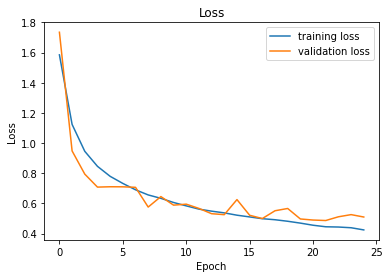

In [37]:
# 7. Vẽ đồ thị loss của traning set và validation set
numOfEpoch = 25
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

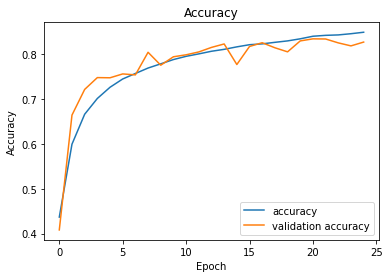

In [38]:
# 8. Vẽ đồ thị accuracy của traning set và validation set
numOfEpoch = 25
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [39]:
# 9.Đánh giá model với testset
start_time = time.time()
print('[loss, accuracy]: ', model.evaluate(X_test, y_test, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 1s 4ms/step - loss: 0.5248 - accuracy: 0.8222
[loss, accuracy]:  [0.5248399376869202, 0.8222000002861023]
Running time: 2.74 (s)


[[2.4975989e-05 3.3808690e-03 7.4705048e-10 6.2328532e-08 7.7746698e-12
  3.5905990e-11 1.7561483e-10 4.1462059e-12 9.9659216e-01 1.9470274e-06]]
[8] 8
Giá trị dự đoán:  ship


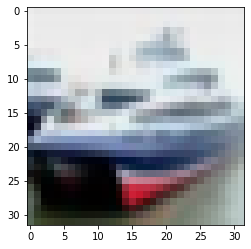

In [40]:
# 10.predict
id =1
plt.imshow(X_test[id])

y_predict = model.predict(X_test[id].reshape(1, 32, 32, 3))
print(y_predict)
y_predict = np.argmax(y_predict)
print(y_test[id], y_predict)
print('Giá trị dự đoán: ', label[y_predict])